### *Projeto Integrado - ICE Store*


# ETAPA 1: Importando Dados e Bibliotecas

In [24]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st
# Lendo o dataset
games = pd.read_csv('./games.csv')

In [25]:
print(games.info())

<class 'pandas.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  str    
 1   Platform         16715 non-null  str    
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  str    
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  str    
 10  Rating           9949 non-null   str    
dtypes: float64(6), str(5)
memory usage: 2.0 MB
None


# ETAPA 2: Preparação dos dados

*Na nossa tabela encontramos diversos valores ausentes, alguns deles podendo ter sido gerados por erros de armazenamento no banco de dados, como também por falta de informações que poderiam estar em processo de levantamento (atualização), como as notas dos usuários de jogos vendidos recentemente. Com isso, existem alguns dados citados abaixo que abordaremos o processo de atribuição de valores, pois levamos em consideração que esses dados serão importantes nos processos de filtragem que se seguirão no decorrer da nossa análise.* 
 - *Iremos definir para os jogos sem ano de lançamento (year_of_release) o valor da mediana em relação aos dados que se encontram armazenados em nosso dataset, com isso teremos uma data padrão para esses dados ausentes.*
 - *A coluna "user_score", possui dados ausentes e dados nomeados como "tbd" ou "To be determined", e com isso nossa coluna possui dados do tipo object, para nossa análise precisamos que ela se apresente com tipo float, e com isso iremos utilizar a mesma abordagem que foi utilizada na coluna "year_of_release", porém utilizando a média calculada a partir da coluna "user_score".*

In [15]:
# Transformando as colunas para nomes minúsculos

new_columns = [] # criando uma lista vazia para os novos nomes

for old_names in games.columns: # pequeno ciclo para acessar os nomes das colunas
    name_lowered = old_names.lower() # convertendo as colunas do dateset com o método lower()
    new_columns.append(name_lowered) # atribuindo os nomes minúsculos a nossa lista "new_columns"

games.columns = new_columns # atribuindo a lista com os novos nomes as colunas do Dataset.

# Imprindo as informações do dataset atualizado
print(games.info())

<class 'pandas.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  str    
 1   platform         16715 non-null  str    
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  str    
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  str    
 10  rating           9949 non-null   str    
dtypes: float64(6), str(5)
memory usage: 2.0 MB
None


In [16]:
# Verificando dados ausentes na nossa tabela 'games'
ausentes = games.isna().sum()
# Imprimindo a quantidade de valores ausentes
ausentes

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [17]:
# Corrigindo dados ausentes na coluna "name"
miss_names = ~games['name'].isna()
games_filtered = games[miss_names] # Filtrando a coluna com os dados não ausentes

In [27]:
# Corrigindo dados ausentes na coluna "year_of_release"
games_years = ~games_filtered['year_of_release'].isna()
games_filtered = games_filtered[games_years].copy()
games_filtered.loc[:, 'year_of_release'] = games_filtered['year_of_release'].astype('int') # Convertendo para Dtype = int

print(games_filtered.info()) # imprimindo as informações da tabela atualizada

<class 'pandas.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  str    
 1   platform         16444 non-null  str    
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  str    
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   str    
 10  rating           9768 non-null   str    
dtypes: float64(6), str(5)
memory usage: 2.1 MB
None


In [22]:
# Corrigindo valores ausentes na coluna 'critic_score'
median_critic = games_filtered['critic_score'].median()
games_filtered.loc[: , 'critic_score'] = games_filtered['critic_score'].fillna(median_critic)
print(median_critic)


71.0


In [28]:
# Convertendo a coluna de object para float sem atribuir novos valores à NaN e 'tbd'
games_filtered['user_score'] = pd.to_numeric(games_filtered['user_score'], errors='coerce')
print(games_filtered.info())

<class 'pandas.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  str    
 1   platform         16444 non-null  str    
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  str    
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   str    
dtypes: float64(7), str(4)
memory usage: 2.1 MB
None


In [29]:
# Calculando o total de vendas para os jogos e atribuindo a uma nova coluna
games_filtered['global_sales'] = games_filtered['na_sales'] + games_filtered['eu_sales'] + games_filtered['jp_sales'] + games_filtered['other_sales']
games_filtered # imprimindo resultado

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,71.0,NaN,NaN,0.01


# ETAPA 3: Análise de dados

In [31]:
# Verificando quantos jogos foram lançados por ano
games_per_year = games_filtered['year_of_release'].value_counts().sort_index() # utilizando .value_counts() para contar a quantidade de jogos lançados em cada ano e o sort_index para ordernar em ordem crescente.
print(games_per_year.head()) # imprimindo nossa variável com os valores gerados.

year_of_release
1980.0     9
1981.0    46
1982.0    36
1983.0    17
1984.0    14
Name: count, dtype: int64


In [32]:
# Vendas totais por plataforma
platform_sales = games_filtered.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
# Media das vendas por plataforma
platform_mean = games_filtered.groupby('platform')['global_sales'].mean().sort_values(ascending=False)
# Mediana das vendas por plataforma
platform_median = games_filtered.groupby('platform')['global_sales'].median().sort_values(ascending=False)
# Quantidade de jogos por plataforma
platform_count = games_filtered.groupby('platform').size().sort_values(ascending=False)

# Cálculo para as plataformas
platform_analysis = games_filtered.groupby('platform')['global_sales'].agg([
    'sum',      # Total de vendas
    'mean',     # Média
    'median',   # Mediana
    'count'     # Número de jogos
]).round(2)

# Ordenando por vendas totais
platform_analysis = platform_analysis.sort_values('sum', ascending=False)
print(platform_analysis.head(10))

              sum  mean  median  count
platform                              
PS2       1233.56  0.58    0.23   2127
X360       961.24  0.78    0.28   1232
PS3        931.34  0.71    0.28   1306
Wii        891.18  0.69    0.19   1286
DS         802.78  0.38    0.11   2121
PS         727.58  0.61    0.26   1190
PS4        314.14  0.80    0.20    392
GBA        312.88  0.39    0.16    811
PSP        289.53  0.24    0.09   1193
3DS        257.81  0.50    0.12    512


In [33]:
best_platform = platform_sales[platform_sales > 500.00].index

print(f"\nPlataformas com vendas > US$ 250M: {best_platform}")



Plataformas com vendas > US$ 250M: Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='str', name='platform')


***Abaixo iremos analisar as vendas das plataformas agrupadas por ano de lançamento dos jogos***

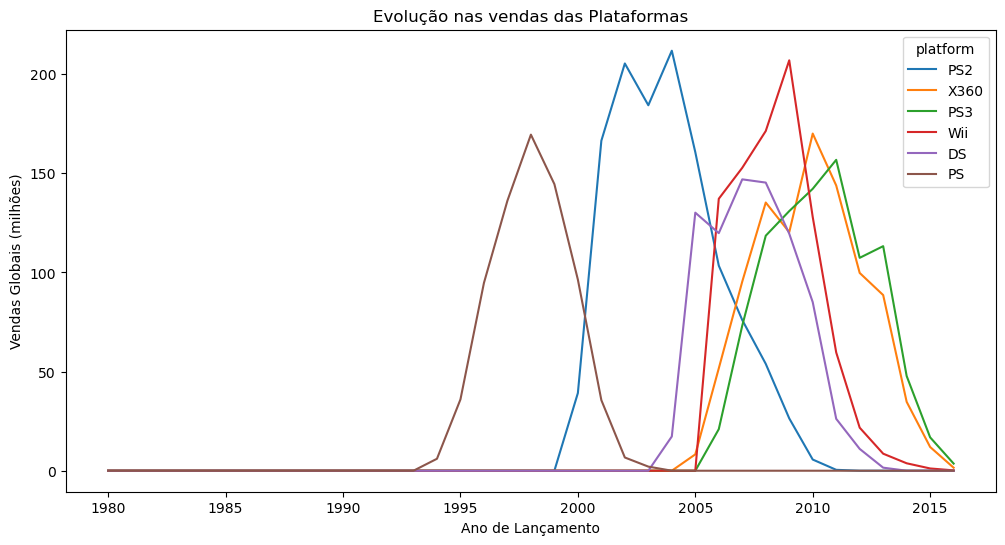

In [36]:
# Agrupando por plataforma e ano de lançamento
platform_year_release = games_filtered.groupby(['platform', 'year_of_release'])['global_sales'].sum()
# Ver como cada plataforma performou ao longo dos anos
platform_evolution = games_filtered.groupby(['year_of_release', 'platform'])['global_sales'].sum()
sales_timeline = platform_evolution.unstack(fill_value=0)
# Visualizar evolução de vendas
sales_timeline[best_platform].plot(kind='line', figsize=(12, 6))
plt.title('Evolução nas vendas das Plataformas')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Globais (milhões)')
plt.show()

In [37]:
# Filtrando as plataformas que deixaram de vender ao longo dos anos
recent_years = [2014, 2015, 2016] # Anos escolhidos para verificação
old_platforms = [] # Lista que irá conter os dados filtrado no laço abaixo

for platform in games_filtered['platform'].unique():
    # verificando se há vendas no passado
    old_sales = platform_evolution[platform_evolution.index.get_level_values('platform') == platform]
    # verificar se não tem vendas recentes
    recent_sales = old_sales[old_sales.index.get_level_values('year_of_release').isin(recent_years)]
    # verificando a quantidade de vendas dos filtros com IF
    if len(old_sales) > 0 and len(recent_sales) == 0:
        old_platforms.append(platform) # Atribuindo as plataformas a lista
print("Plataformas que deixaram de ser populares: {} ".format(old_platforms))

Plataformas que deixaram de ser populares: ['NES', 'GB', 'DS', 'PS2', 'SNES', 'GBA', 'N64', 'PS', 'XB', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'] 


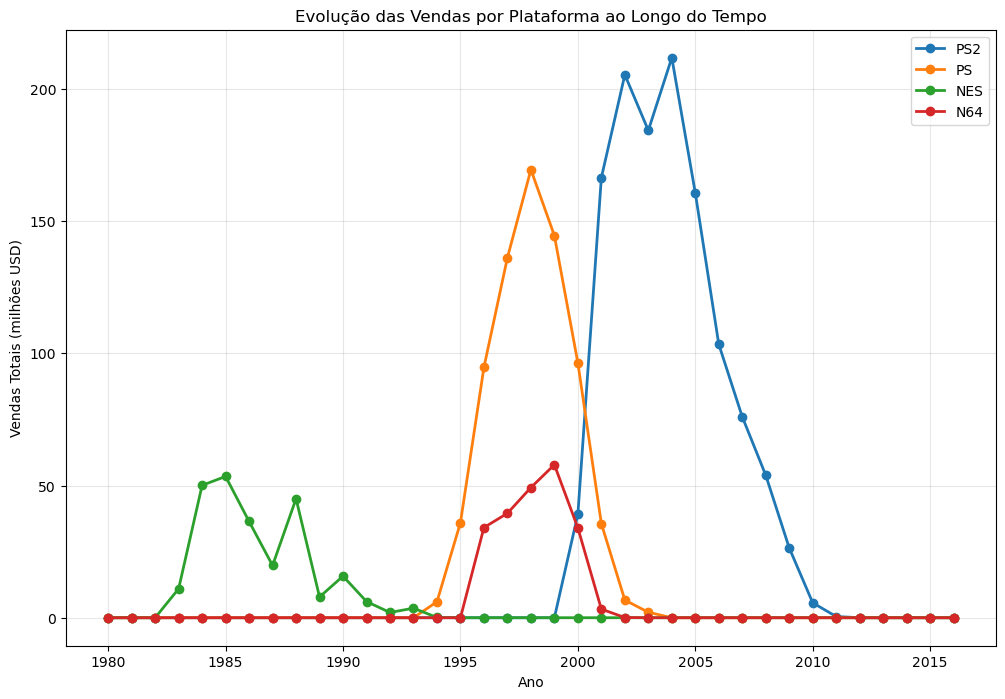

In [38]:
# Selecionar algumas plataformas interessantes
selected_platforms = ['PS2', 'Xbox', 'PS', 'NES', 'N64']  # Exemplo

plt.figure(figsize=(12, 8))
for platform in selected_platforms:
    if platform in sales_timeline.columns:
        plt.plot(sales_timeline.index, sales_timeline[platform], 
                marker='o', label=platform, linewidth=2)

plt.title('Evolução das Vendas por Plataforma ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (milhões USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [39]:
# Calcular primeiro e último ano para cada plataforma
platforms = games_filtered.groupby('platform')['year_of_release'].agg([
     ('first_year', 'min'),
     ('last_year', 'max'),
     ('games_total', 'count')
 ]).reset_index()

# Calculando duração das plataformas
platforms['platform_duration'] = platforms['last_year'] - platforms['first_year']

print(platforms.head(20))

   platform  first_year  last_year  games_total  platform_duration
0      2600      1980.0     1989.0          116                9.0
1       3DO      1994.0     1995.0            3                1.0
2       3DS      2011.0     2016.0          512                5.0
3        DC      1998.0     2008.0           52               10.0
4        DS      1985.0     2013.0         2121               28.0
5        GB      1988.0     2001.0           97               13.0
6       GBA      2000.0     2007.0          811                7.0
7        GC      2001.0     2007.0          542                6.0
8       GEN      1990.0     1994.0           27                4.0
9        GG      1992.0     1992.0            1                0.0
10      N64      1996.0     2002.0          316                6.0
11      NES      1983.0     1994.0           98               11.0
12       NG      1993.0     1996.0           12                3.0
13       PC      1985.0     2016.0          957               

In [40]:
print('===MEDIANA DE DURAÇÃO DAS PLATAFORMAS===')
print('{} anos'.format(platforms['platform_duration'].median()))

===MEDIANA DE DURAÇÃO DAS PLATAFORMAS===
6.0 anos


* *Acima criamos gráficos com algumas plataformas com as maiores quantidade de vendas (populares) em seus anos de atividade, e também observamos a queda das mesmas em trocas geracionais, por exemplo: PS (playstation 1) para o PS2 (playstation 2). Como também encontramos a mediana geracional entre as plataformas, na qual temos uma diferença de 6 anos para uma nova plataforma surgir, e a sua antecessora começar a recuar em vendas até ser descontinuada, explicitamente quando deixam de ser lançados novos jogos para a mesma.*

* *Portanto para a continuidade das nossas análises, escolhemos os últimos 4 anos de vendas, pois entendemos que esses anos se encontram durante as transições das antigas e novas plataformas de gigantes da tecnologia, como Nintendo, Microsoft e Sony.*

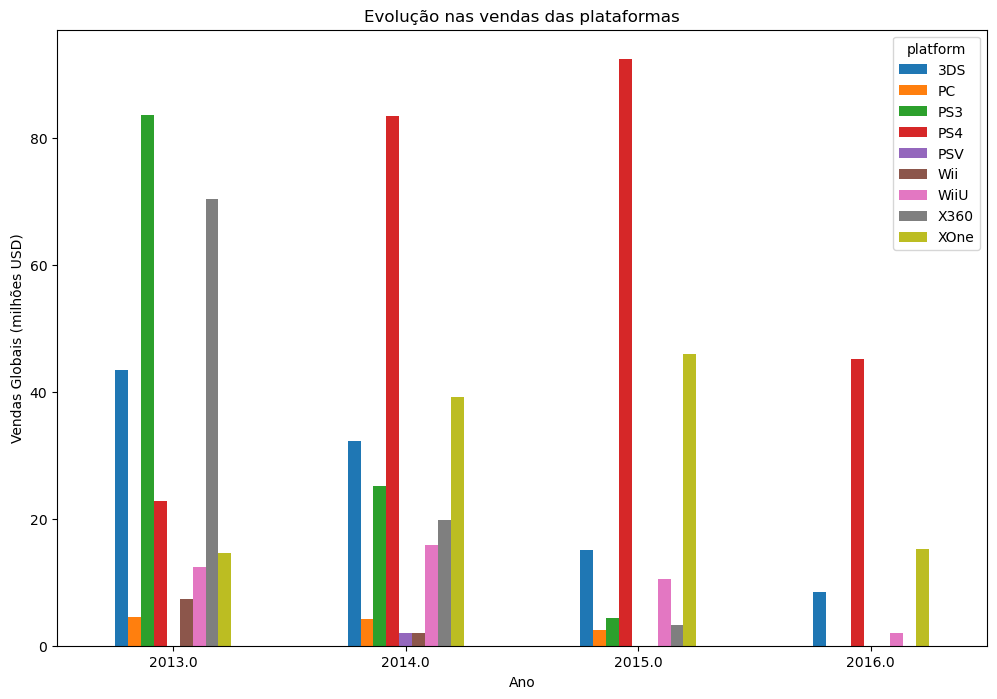

In [41]:
# Filtrar dados para o período escolhido
recent_data = games_filtered[games_filtered['year_of_release'].isin([2013, 2014, 2015, 2016])]
# Filtrando plaformas com mais de 1 milhão em vendas no mercado global
recent_data_1 = recent_data[recent_data['global_sales'] > 1.0]
# Agrupando os dados
new_platforms = recent_data_1.groupby(['year_of_release', 'platform'])['global_sales'].sum()
# Transformando os dados em uma tabela pivô
recent_sales = new_platforms.unstack(fill_value=0)
# Criando gráfico de barras para melhor visualizar
recent_sales.plot(kind='bar', figsize=(12,8), rot=0)
plt.title('Evolução nas vendas das plataformas')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (milhões USD)')
plt.show()

* *Acima visualizamos o últimos 4 anos de vendas das plataformas que obtiveram mais de 1 milhão em vendas globais.*
* *Em 2013 as vendas são lideradas pelo PS3, Xbox 360 e 3DS. Ainda em 2013, observamos o lançamento de novas plataformas, como PS4, Xbox One, WiiU. Em 2014 há inversão no total de vendas de duas plataformas, PS3 e X360 com PS4 e XOne, sendo as duas últimas a nova geração que vieram para substituir seus antecessores.*
* *Entre 2013 e 2016 tivemos uma queda gradativa nas vendas do 3DS.*
* *Em 2016, temos 4 plataformas que ultrapassaram 1 milhão em vendas. E comparado aos anos anteriores, observamos grande queda nas vendas de todas as plaformas*


In [42]:
# Selecionando as plataformas desejadas
potencial_sales = recent_sales[['3DS', 'PC', 'PS4', 'WiiU', 'XOne']]

# Calculando variância e desvio padrão
variance_sales = potencial_sales.var()
desvio_sales = potencial_sales.std()

print("=== ANÁLISE DE VARIABILIDADE DAS PLATAFORMAS (2013-2016) ===")
print(f"Número de anos analisados: {len(potencial_sales)}")
print(f"Plataformas analisadas: {list(potencial_sales.columns)}")

print("\n=== VARIÂNCIA ===")
for platform, var in variance_sales.items():
    print(f"{platform}: {var:.2f}")

print("\n=== DESVIO PADRÃO ===")
for platform, std in desvio_sales.items():
    print(f"{platform}: {std:.2f}")


=== ANÁLISE DE VARIABILIDADE DAS PLATAFORMAS (2013-2016) ===
Número de anos analisados: 4
Plataformas analisadas: ['3DS', 'PC', 'PS4', 'WiiU', 'XOne']

=== VARIÂNCIA ===
3DS: 254.23
PC: 4.25
PS4: 1066.77
WiiU: 34.60
XOne: 263.22

=== DESVIO PADRÃO ===
3DS: 15.94
PC: 2.06
PS4: 32.66
WiiU: 5.88
XOne: 16.22


In [43]:
# Coeficiente de variação para comparar consistência
cv_sales = (desvio_sales / potencial_sales.mean()) * 100
print("\n=== COEFICIENTE DE VARIAÇÃO (%) ===")
print("(Menor valor = maior consistência)")
print(cv_sales.sort_values())
print()

# Imprimindo os dados estatísticos com o método .describe()
print('=== Imprimindo os dados estatísticos ===')
print(potencial_sales.describe().round(2))


=== COEFICIENTE DE VARIAÇÃO (%) ===
(Menor valor = maior consistência)
platform
PS4     53.629159
XOne    56.480796
WiiU    57.666452
3DS     64.325335
PC      74.045789
dtype: float64

=== Imprimindo os dados estatísticos ===
platform    3DS    PC    PS4   WiiU   XOne
count      4.00  4.00   4.00   4.00   4.00
mean      24.79  2.78  60.90  10.20  28.72
std       15.94  2.06  32.66   5.88  16.22
min        8.47  0.00  22.74   2.04  14.55
25%       13.39  1.84  39.53   8.41  15.06
50%       23.66  3.34  64.24  11.42  27.17
75%       35.06  4.29  85.62  13.22  40.84
max       43.36  4.45  92.38  15.91  46.01


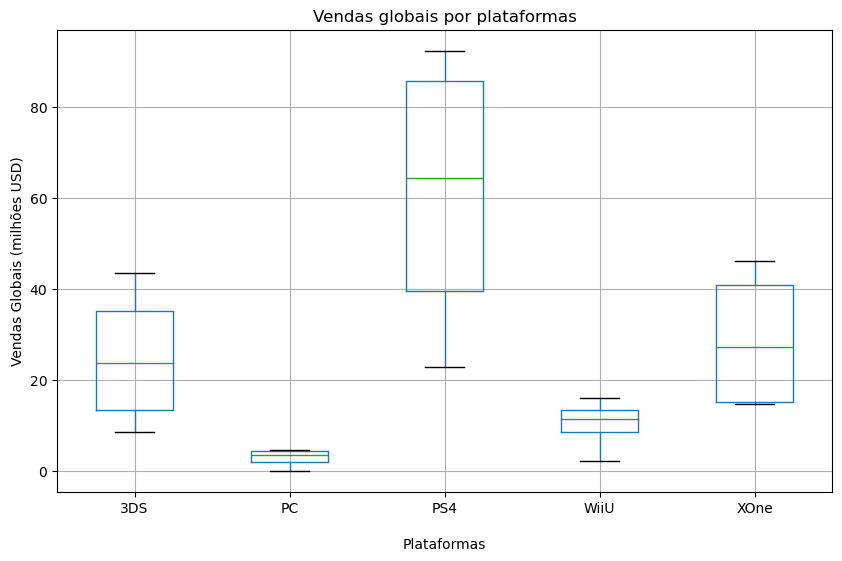

In [44]:
# Criando um boxplot para vendas globais das plataformas
plt.figure(figsize=(10, 6))
potencial_sales.boxplot()
plt.title('Vendas globais por plataformas')
plt.xlabel('\nPlataformas')
plt.ylabel('Vendas Globais (milhões USD)')
plt.show()


*No boxplot criado acima, observamos os últimos 4 anos de vendas das 5 plataformas com potencial de crescimento para 2017.*

*Estes são o 3DS e PC por terem uma duração maior, o 3DS vem recebendo novas versões ao longo dos anos e mantendo médias altas de vendas no segmento de handheld, e o PC por ser de plataforma aberta e versátil, assim entregando consistência em suas vendas no passar dos anos.*
*O PS4, XOne e WiiU por serem a nova geração de consoles das maiores desenvolvedoras, e estarem no inicio da sua vida geracional.*

*A diferença nas vendas entre as 5 plataformas em questão são significativas, com o PS4 alcançando máximas maiores, mantendo uma média de venda nos 4 anos de 60 milhões, sendo acompanhado pelo XOne e 3DS com médias e máximas bem próximas na casa dos 24 - 28 milhões na média e 43 - 46 milhões nas máximas.*

In [45]:
# Avaliações de usuários e profissionais afetam as vendas do PS4 ?
ps4 = recent_data[recent_data['platform'] == 'PS4']
print(ps4)

                                 name platform  year_of_release         genre  \
31          Call of Duty: Black Ops 3      PS4           2015.0       Shooter   
42                 Grand Theft Auto V      PS4           2014.0        Action   
77                            FIFA 16      PS4           2015.0        Sports   
87       Star Wars Battlefront (2015)      PS4           2015.0       Shooter   
92     Call of Duty: Advanced Warfare      PS4           2014.0       Shooter   
...                               ...      ...              ...           ...   
16500                     Root Letter      PS4           2016.0     Adventure   
16503               Shin Hayarigami 2      PS4           2016.0     Adventure   
16526                      Dungeons 2      PS4           2016.0  Role-Playing   
16530         Carmageddon: Max Damage      PS4           2016.0        Action   
16585   Farming 2017 - The Simulation      PS4           2016.0    Simulation   

       na_sales  eu_sales  

In [46]:
# Criando gráfico de dispersão interativo
top_30_ps4 = ps4.nlargest(30, 'global_sales')

fig = px.scatter(top_30_ps4, x='global_sales', y='name',
                 title='Top 30 Jogos PS4 - Vendas Globais',
                 labels={'global_sales':'Vendas Globais (milhões USD)', 'name':'Jogos'},
                 hover_data=['user_score', 'critic_score'])
fig.update_layout(
    width=1000,
    height=900,
    font=dict(size=12)
)
fig.show()

In [47]:
# calculando a correlação na tabela da plataforma PS4
ps4_corr = ps4.corr(numeric_only=True) # calculando a correlação de toda a tabela
ps4_corr


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,global_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.024404,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.328053,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.309054,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.250289,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.336512,-0.035639,0.998051
critic_score,-0.024404,0.328053,0.309054,0.250289,0.336512,1.000000,0.547472,0.338706
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.547472,1.000000,-0.031957
global_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.338706,-0.031957,1.000000


In [48]:
# Analisando apenas jogos com dados originais de user_score
ps4_original_user = ps4[ps4['user_score'] != 7.13]  # Remove valores preenchidos
print(f"Jogos com dados originais na coluna 'user_score': {len(ps4_original_user)}")

# Calcular correlação apenas com dados originais
if len(ps4_original_user) > 10:  # Se tiver dados suficientes
    corr_original_user = ps4_original_user[['user_score', 'global_sales']].corr()
    print("\nCorrelação com dados originais:")
    print(corr_original_user)


Jogos com dados originais na coluna 'user_score': 392

Correlação com dados originais:
              user_score  global_sales
user_score      1.000000     -0.031957
global_sales   -0.031957      1.000000


In [49]:
# Analisando apenas jogos com dados originais de critic_score
ps4_original_critic = ps4[ps4['critic_score'] != 71]  # Remove valores preenchidos
print(f"Jogos com dados originais 'critic_score': {len(ps4_original_critic)}")

# Calcular correlação apenas com dados originais
if len(ps4_original_critic) > 10:  # Se tiver dados suficientes
    corr_original_critic = ps4_original_critic[['critic_score', 'global_sales']].corr()
    print("\nCorrelação com dados originais:")
    print(corr_original_critic)


Jogos com dados originais 'critic_score': 243

Correlação com dados originais:
              critic_score  global_sales
critic_score      1.000000      0.407721
global_sales      0.407721      1.000000


In [50]:
# Gráfico de dispersão para critic_score x vendas
fig1 = px.scatter(ps4, x='critic_score', y='global_sales',
                  title='Relação: Nota dos Críticos vs Vendas Globais (PS4)',
                  labels={'critic_score':'Nota dos Críticos', 
                         'global_sales':'Vendas Globais (milhões USD)'},
                  hover_data=['name'])
fig1.show()

# Gráfico de dispersão para user_score x vendas  
fig2 = px.scatter(ps4, x='user_score', y='global_sales',
                  title='Relação: Nota dos Usuários vs Vendas Globais (PS4)',
                  labels={'user_score':'Nota dos Usuários',
                         'global_sales':'Vendas Globais (milhões USD)'},
                  hover_data=['name'])
fig2.show()

**Cálculos de correlação**
* *Encontramos uma correlação positiva moderada (0.406) entre a coluna 'critic_score' e as vendas globais da plataforma PS4, indicando assim que avaliações mais altas dos profissionais críticos tendem a resultar em vendas maiores, mesmo sendo apenas uma relação moderada, ainda continua significativa.*
* *Em relação as avaliações dos usuários (user_score), temos uma correlação quase zero (-0.0319) com as vendas globais do PS4, indicando que essas notas não influenciam muito nas vendas.*

In [51]:
# Filtrando o nome dos jogos
games_filter = ps4['name']
games_sales = recent_data[recent_data['name'].isin(games_filter)] # Filtrando a tabela pelo nome dos jogos que queremos analisar.
games_others_plat = games_sales[games_sales['platform'] != 'PS4'] # Filtrando plataformas diferentes do PS4

# Verificando quantos jogos do PS4 existem em outras plataformas
print(f"Jogos no PS4: {ps4['name'].nunique()}")
print(f"Jogos do PS4 encontrados em outras plataformas: {games_others_plat['name'].nunique()}")


Jogos no PS4: 392
Jogos do PS4 encontrados em outras plataformas: 316


In [52]:
top_30_plat = games_others_plat.nlargest(30, 'global_sales')

fig = px.scatter(top_30_plat, x='global_sales', y='name',
                 title='Jogos em outras plataformas - Vendas Globais',
                 labels={'global_sales':'Vendas Globais (milhões USD)', 'name':'Jogos'},
                 hover_data=['user_score', 'critic_score', 'platform'])
fig.update_layout(
    width=1000,
    height=900,
    font=dict(size=12)
)
fig.show()


In [56]:
# Jogos que encontramos na plataforma PS4 com maiores diferenças de vendas em outras plataformas

print("Top 30 jogos com maiores vendas em outras plataformas:\n")
top_others = games_others_plat.nlargest(30, 'global_sales')[['name', 'platform', 'global_sales']]
print(top_others)

Top 30 jogos com maiores vendas em outras plataformas:

                                name platform  global_sales
16                Grand Theft Auto V      PS3         21.05
23                Grand Theft Auto V     X360         16.27
60              Call of Duty: Ghosts     X360         10.24
69              Call of Duty: Ghosts      PS3          9.36
72                         Minecraft     X360          9.18
99         Call of Duty: Black Ops 3     XOne          7.39
126                          FIFA 14      PS3          6.46
149                   The Last of Us      PS3          5.86
165               Grand Theft Auto V     XOne          5.47
180                        Minecraft      PS3          5.27
179   Call of Duty: Advanced Warfare     XOne          5.26
255   Call of Duty: Advanced Warfare      PS3          4.36
263   Call of Duty: Advanced Warfare     X360          4.28
264                          FIFA 15      PS3          4.28
270                        Fallout 4     XOn

In [57]:
# Distribuição de vendas globais e regionais por gênero 
genre = games_filtered.groupby('genre')[['global_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
print("*** DISTRIBUIÇÃO DE VENDAS POR GÊNERO ***\n")
print(genre)

*** DISTRIBUIÇÃO DE VENDAS POR GÊNERO ***

              global_sales  na_sales  eu_sales  jp_sales  other_sales
genre                                                                
Action             1716.52    863.17    510.99    160.14       182.22
Adventure           233.33    101.52     63.20     52.24        16.37
Fighting            442.66    220.51     99.00     87.28        35.87
Misc                790.29    399.57    210.60    107.02        73.10
Platform            825.55    444.44    199.39    130.71        51.01
Puzzle              239.89    121.13     49.78     56.68        12.30
Racing              723.49    356.86    234.49     56.63        75.51
Role-Playing        931.08    330.04    188.24    353.39        59.41
Shooter            1041.36    584.83    314.52     38.68       103.33
Simulation          387.96    180.40    113.35     63.64        30.57
Sports             1309.67    671.20    371.33    134.93       132.21
Strategy            172.57     67.75     44.79 

In [55]:
# Análise mais completa das vendas globais por gênero
genre_analysis = games_filtered.groupby('genre').agg({
    'global_sales': ['sum', 'mean', 'median', 'count']
}).round(2)

# Simplificando os nomes das colunas
genre_analysis.columns = ['total_sales', 'mean_sales', 'median_sales', 'game_count']
genre_analysis = genre_analysis.sort_values('total_sales', ascending=False)

print("*** ANÁLISE COMPLETA POR GÊNERO ***\n")
print(genre_analysis)

*** ANÁLISE COMPLETA POR GÊNERO ***

              total_sales  mean_sales  median_sales  game_count
genre                                                          
Action            1716.52        0.52          0.19        3307
Sports            1309.67        0.57          0.22        2306
Shooter           1041.36        0.80          0.24        1296
Role-Playing       931.08        0.63          0.18        1481
Platform           825.55        0.94          0.27         878
Misc               790.29        0.46          0.16        1721
Racing             723.49        0.59          0.19        1226
Fighting           442.66        0.53          0.21         837
Simulation         387.96        0.45          0.15         857
Puzzle             239.89        0.42          0.10         569
Adventure          233.33        0.18          0.05        1293
Strategy           172.57        0.26          0.10         673


In [58]:
# Verificando a média das notas por gênero
genre_grade = games_filtered.groupby('genre')[['user_score', 'critic_score']].mean().round(2)
print("*** NOTAS POR GÊNERO ***\n")
print(genre_grade)

*** NOTAS POR GÊNERO ***

              user_score  critic_score
genre                                 
Action              7.06         68.58
Adventure           7.14         69.58
Fighting            7.30         70.11
Misc                6.81         69.71
Platform            7.31         69.40
Puzzle              7.14         69.54
Racing              7.04         69.23
Role-Playing        7.62         71.82
Shooter             7.05         70.47
Simulation          7.13         70.03
Sports              6.95         71.50
Strategy            7.29         71.51


*Seguindo o enunciado, encontramos os 3 maiores gêneros em vendas: Action, Sports, Shooter*

*E os 3 menos vendidos: Puzzle, adventure e strategy*

*Os dois primeiros gêneros mais vendidos possuem uma grande contagem de jogos, isso influência em uma quantidade maior de receita em vendas. Mas também sabemos que esses dois primeiros jogos atraem mais compradores por serem jogos que exploram o instinto humano de competição e curiosidade. Os jogos de gênero shooter entregam adrenalina e desafio em sobreviver em uma missão perigosa como em call of duty e battlefield.*

*Com isso as vendas de cada gênero irá depender do gosto do usuário e também da qualidade do título lançado, pois jogos bem produzidos acabam por receber notas boas e assim despertam interesse em usuários que normalmente não comprariam.*

*Em relação aos 3 gêneros menos vendidos citados acima, as vendas deles estão estritamente ligadas a baixa procura, sendo assim gêneros nichados, pois mesmo com média de notas criticas e de usuários em bons números, observamos que as vendas não atingem altos valores, como também não encontramos diferenças nas vendas por região para tais gêneros.*

# Etapa 4. Criando um perfil de usuário para cada região

In [59]:
# Função criada para separar cada região unicamente e exibir o resultado desejado.
def perfil_regiao(regiao):
    # 5 plataformas principais
    plat_sales = recent_data.groupby('platform')[regiao].sum().sort_values(ascending=False).head(5)
    
    # 5 principais gêneros  
    genre_sales = recent_data.groupby('genre')[regiao].sum().sort_values(ascending=False).head(5)
    
    # Vendas por Rating
    rating_sales = recent_data.groupby('rating')[regiao].sum().sort_values(ascending=False)
    
    # Criando DataFrames organizados
    plat_df = pd.DataFrame({
        'Plataforma': plat_sales.index,
        'Vendas (milhões)': plat_sales.values
    }).reset_index(drop=True)
    
    genre_df = pd.DataFrame({
        'Gênero': genre_sales.index,
        'Vendas (milhões)': genre_sales.values
    }).reset_index(drop=True)
    
    rating_df = pd.DataFrame({
        'Rating': rating_sales.index,
        'Vendas (milhões)': rating_sales.values
    }).reset_index(drop=True)
    
    return {
        'plataformas': plat_df,
        'generos': genre_df,
        'ratings': rating_df
    }


In [60]:
# Chamando a função para região NA
perfil_na = perfil_regiao('na_sales')

print("=== PERFIL DE USUÁRIO - AMÉRICA DO NORTE ===\n")
print(" TOP 5 PLATAFORMAS:")
print(perfil_na['plataformas'])
print("\n TOP 5 GÊNEROS:")
print(perfil_na['generos'])
print("\n VENDAS POR RATING:")
print(perfil_na['ratings'])

=== PERFIL DE USUÁRIO - AMÉRICA DO NORTE ===

 TOP 5 PLATAFORMAS:
  Plataforma  Vendas (milhões)
0        PS4            108.74
1       XOne             93.12
2       X360             81.66
3        PS3             63.50
4        3DS             38.20

 TOP 5 GÊNEROS:
         Gênero  Vendas (milhões)
0        Action            126.05
1       Shooter            109.74
2        Sports             65.27
3  Role-Playing             46.40
4          Misc             27.49

 VENDAS POR RATING:
  Rating  Vendas (milhões)
0      M            165.21
1      E             79.05
2   E10+             54.24
3      T             49.79


In [61]:
# Chamando a função para região EU
perfil_eu = perfil_regiao('eu_sales')

print("=== PERFIL DE USUÁRIO - EUROPA ===\n")
print(" TOP 5 PLATAFORMAS:")
print(perfil_eu['plataformas'])
print("\n TOP 5 GÊNEROS:")
print(perfil_eu['generos'])
print("\n VENDAS POR RATING:")
print(perfil_eu['ratings'])

=== PERFIL DE USUÁRIO - EUROPA ===

 TOP 5 PLATAFORMAS:
  Plataforma  Vendas (milhões)
0        PS4            141.09
1        PS3             67.81
2       XOne             51.59
3       X360             42.52
4        3DS             30.96

 TOP 5 GÊNEROS:
         Gênero  Vendas (milhões)
0        Action            118.13
1       Shooter             87.86
2        Sports             60.52
3  Role-Playing             36.97
4        Racing             20.19

 VENDAS POR RATING:
  Rating  Vendas (milhões)
0      M            145.32
1      E             83.36
2   E10+             42.69
3      T             41.95


In [62]:
# Chamando a função para região JP
perfil_jp = perfil_regiao('jp_sales')

print("=== PERFIL DE USUÁRIO - JAPÃO ===\n")
print(" TOP 5 PLATAFORMAS:")
print(perfil_jp['plataformas'])
print("\n TOP 5 GÊNEROS:")
print(perfil_jp['generos'])
print("\n VENDAS POR RATING:")
print(perfil_jp['ratings'])


=== PERFIL DE USUÁRIO - JAPÃO ===

 TOP 5 PLATAFORMAS:
  Plataforma  Vendas (milhões)
0        3DS             67.81
1        PS3             23.35
2        PSV             18.59
3        PS4             15.96
4       WiiU             10.88

 TOP 5 GÊNEROS:
         Gênero  Vendas (milhões)
0  Role-Playing             51.04
1        Action             40.49
2          Misc              9.20
3      Fighting              7.65
4       Shooter              6.61

 VENDAS POR RATING:
  Rating  Vendas (milhões)
0      T             20.59
1      E             15.14
2      M             14.11
3   E10+              5.89


*Acima criamos uma função para filtrar separadamente as regiões e as mostramos em formato de tabela para melhor visualização entre plataformas, generos, ratings e seus valores de vendas.*
* *Nos mercados da América do Norte e Europa encontramos um padrão em relação aos pontos analisados, apenas havendo uma única diferença no quinto gênero mais vendido nos dois mercados, onde na América temos o gênero misc e na Europa o gênero racing.*
* *Já no mercado Japonês vemos uma maior diferença, possivelmente ligado a cultura e costumes regionais, onde observamos a preferência dos usuários por plataformas handheld (3DS e PSV), jogos do genero RPG (Role-Playing). E apenas no caso do japão, as vendas parecem ser afetadas pelo rating, já que as maiores vendas relatadas somam 20 milhões com rating T (teen) e 15 milhões (everyone), mas isso possivelmente está ligado aos valores ausentes que encontramos na coluna 'rating' do nosso dataset original.*

# Teste de hipóteses

**PRIMEIRO CENÁRIO** - ***As hipóteses escolhidas são:***

* **Hipótese nula:** As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
* **Hipótese alternativa:** As classificações médias dos usuários das plataformas Xbox One e PC são as diferentes.

Escolhemos o teste estatístico da Hipótese sobre a igualdade das médias de duas populações.

Nosso valor de alpha será: 5% ou 0.05


In [65]:
# Testando as hipóteses do primeiro cenário
xbox_one = recent_data[recent_data['platform'] == 'XOne']
pc = recent_data[recent_data['platform'] == 'PC']

# Filtrando apenas valores válidos (não NaN)
xbox_scores = xbox_one['user_score'].dropna().values
pc_scores = pc['user_score'].dropna().values

# realizando teste T
results = st.ttest_ind(xbox_scores, pc_scores)
alpha = 0.05

print('*** TESTE DE HIPÓTESE DO PRIMEIRO CENÁRIO ***')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('\nRejeitamos a hipótese nula')
    print('As médias são DIFERENTES')
else:
    print('\nNão podemos rejeitar a hipótese nula')
    print('Não há evidência de diferença significativa')

*** TESTE DE HIPÓTESE DO PRIMEIRO CENÁRIO ***
p-value:  0.14012658403611647

Não podemos rejeitar a hipótese nula
Não há evidência de diferença significativa


**SEGUNDO CENÁRIO** - ***As hipóteses escolhidas são:***

* **Hipótese nula:** As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são as mesmas.
* **Hipótese alternativa:** As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Escolhemos o teste estatístico da Hipótese sobre a igualdade das médias de duas populações.

Nosso valor de alpha será: 5% ou 0.05

In [66]:
# Testando as hipóteses do segundo cenário
action = recent_data[recent_data['genre'] == 'Action']
sports = recent_data[recent_data['genre'] == 'Sports']

# Filtrando apenas valores válidos (não NaN)
action_score = action['user_score'].dropna().values
sports_score = sports['user_score'].dropna().values

# realizando teste T
results = st.ttest_ind(action_score, sports_score)
alpha = 0.05

print('*** TESTE DE HIPÓTESE SEGUNDO CENÁRIO ***')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('\nRejeitamos a hipótese nula')
    print('As médias são DIFERENTES')
else:
    print('\nNão podemos rejeitar a hipótese nula')
    print('Não há evidência de diferença significativa')

*** TESTE DE HIPÓTESE SEGUNDO CENÁRIO ***
p-value:  1.0517832389140023e-27

Rejeitamos a hipótese nula
As médias são DIFERENTES


# Conclusão Geral

*Chegamos a conclusão deste projeto. Estarei explicando e também listando os pontos abordados, como foram tratados os dados e as decisões tomadas que nos guiaram até o fim deste projeto.*

* *Iniciamos realizando toda a preparação dos dados, fazendo correções e alterações na tabela principal que achamos necessárias para obter uma análise mais limpa e bem organizada. Logo também realizamos diversas filtragens para abranger todos os nossos temas abordados e favorecer nosso processo de análise das vendas, comportamentos e finalização do projeto.*
* *Com isso nossas análises indicaram como já citado anteriormente durante o projeto, que novas plataformas possuem uma janela de lançamento de em média 6 anos em relação a sua plataforma antecessora, esse padrão de lançamento é facilmente percebido nas plataformas da Sony, Microsoft e Nintendo. Essas empresas lideram o mercado, com as maiores vendas registradas sendo da Sony, com o console PS2 que ultrapassou a marca dos U$1.2 bilhões de dólares, e cerca de 2127 jogos. Mas ao longo dos anos, como informado são lançados novos consoles, plataformas. Portanto nossas análises se dirigem aos últimos 4 anos de vendas da ICE Store, onde nos deparamos com uma troca geracional de plataformas, analisando os anos entre 2013 e 2016 encontramos vendas que inicialmente eram lideradas pelo PS3 e durante a troca geracional pudemos observar a queda dessas vendas e sendo assumidas pelo seu sucessor, o PS4. O mesmo acontecimento é observado para as plataformas da Microsoft (Xbox) e Nintendo (Wii), mas na Nintendo vemos uma queda gradual nas vendas do seu handheld (3DS).*
* *No ano de 2016, observamos uma queda bastante perceptível nas vendas em todas as plataformas, essas quedas podem estar relacionadas aos dados recebidos para análise, já que recebemos uma notificação de que os dados para este ano de 2016 podem estar incompletos. Mesmo assim decidimos por manter esse ano (2016) em nossa abordagem, pois conseguimos observar a dominância nas vendas das plataformas mais recentes, já que as mesma estão no início da sua vida útil. Sendo essas as plataformas com maior potencial em vendas: 3DS, PS4, WiiU, Xbox One e PC, sendo a última plataforma citada a única a não atingir mais de 1 milhão em vendas em 2016, mas sendo um pilar importante pois é a única plataforma aberta, e com maior longevidade entre as demais. Assim a diferença nas vendas entre as 5 plataformas em questão são significativas, com o PS4 alcançando 92 milhões de máxima e mantendo uma média de venda nos 4 anos de 60 milhões, sendo acompanhado pelo XOne e 3DS com médias e máximas bem próximas na casa dos 24 - 28 milhões na média e 43 - 46 milhões nas máximas.*
* *Nas análises de gênero e plataformas por região, como já citado, observamos padrões nos resultados, possivelmente ligados a cultura e costumes locais. Esses resultados podem ajudar a ICE Store a criar campanhas promocionais regionais, assim direcionando corretamente marketings para esses públicos com perfis traçados, assim havendo possibilidade de aumentar as vendas para cada região.*
* *Por fim, ao realizar nossos testes de hipóteses, nos deparamos com o primeiro cenário de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas, assim não havendo base estatística suficiente para afirmar que exista diferenças. Entretanto em nosso segundo cenário de hipótese observamos que existe diferenças estatísticas nas avaliações médias dos usuários para os gêneros Action e Sports, com a média do genêro action maior que o gênero sports, com o gênero action possuindo cerca de mil jogos a mais lançados e como também o gênero mais vendido.*
